# All Models

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from scripts.proj1_helpers import *
DATA_TRAIN_PATH = './data/train.csv' # TODO: download train data and supply path here 
y, tX2, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=False)

In [3]:
from scripts.implementations import *
from scripts.clean_data import *
from scripts.plots import *
from scripts.cross_validation import * 
from scripts.proj1_helpers import *

**Clean the data**

In [4]:
tx = clean_data_test(tX2)

**Gradient Decent**

In [5]:
# Gradient Decent
w_GD, loss_GD = run_GD(y, tx, max_iters = 2000, gamma=0.0001)
loss_GD

nan

In [6]:
local_model_test(y, tx, w_GD)

Local accuracy: 0.0 %.


/Users/theodor/Documents/epfl/ML/CS433-Projects/project1/scripts/proj1_helpers.py:30: RuntimeWarning: invalid value encountered in less_equal
  y_pred[np.where(y_pred <= 0)] = -1
/Users/theodor/Documents/epfl/ML/CS433-Projects/project1/scripts/proj1_helpers.py:31: RuntimeWarning: invalid value encountered in greater
  y_pred[np.where(y_pred > 0)] = 1


**Stochastic Gradient Decent**

In [7]:
# Stochastic Gradient Decent
w_SGD, loss_SGD = run_SGD(y, tx, max_iters = 50000, gamma=0.00001)
loss_SGD

/Users/theodor/Documents/epfl/ML/CS433-Projects/project1/scripts/implementations.py:72: RuntimeWarning: invalid value encountered in subtract
  w = w - gamma * stoch_gradient


nan

In [8]:
local_model_test(y, tx, w_SGD)

Local accuracy: 0.0 %.


**Least Squares**

In [9]:
# Least Squares without feature expansion
w_LS, loss_LS = least_squares(y, tx)
loss_LS

0.36641200994059536

In [10]:
local_model_test(y, tx, w_LS)

Local accuracy: 71.596 %.


In [11]:
degree = 7
tX_7 = build_poly(tx, degree)

In [12]:
# Least Squares with feature expansion
w_LS, loss_LS = least_squares(y, tX_7)
loss_LS

0.30500217860487067

In [13]:
local_model_test(y, tX_7, w_LS)

Local accuracy: 79.0616 %.


**Ridge Regression**

In [21]:
degree = 9
tX_12 = build_poly(tx, degree)

In [22]:
lambda_ = 100
w_ridge, loss_ridge = ridge_regression(y, tX_12, lambda_)
loss_ridge

0.3116541192460926

In [23]:
local_model_test(y, tX_12, w_ridge)

Local accuracy: 78.2944 %.


**Cross Validation to find best degree of model**

In [25]:
max_degree = 11
losses_degree = cross_validation_least_squares(y, tx, max_degree)

Currently at degree: 0
Currently at degree: 1
Currently at degree: 2
Currently at degree: 3
Currently at degree: 4
Currently at degree: 5
Currently at degree: 6
Currently at degree: 7
Currently at degree: 8
Currently at degree: 9
Currently at degree: 10
Currently at degree: 11


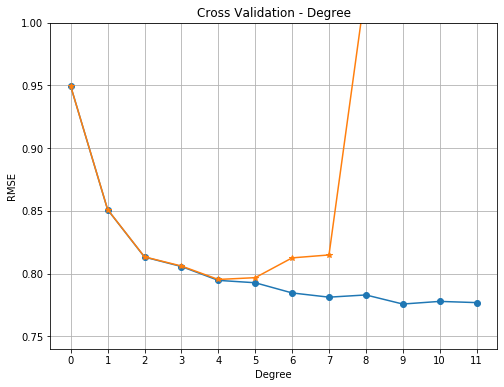

,degree,losses_tr,losses_te
0,0,0.949203,0.949204
1,1,0.850924,0.851002
2,2,0.813137,0.813283
3,3,0.805594,0.805981
4,4,0.794542,0.795280
5,5,0.792654,0.796702
6,6,0.784527,0.812483
7,7,0.781158,0.814812
8,8,0.782925,1.028880
9,9,0.775679,1.852667


In [32]:

plot_cross_validation_degree(losses_degree)
losses_degree

**Cross Validation to find best lambda in Ridge Regression**

In [24]:
degree = 9
losses_lambda = cross_validation_ridge(y, tx, degree)

0.001


KeyboardInterrupt: 

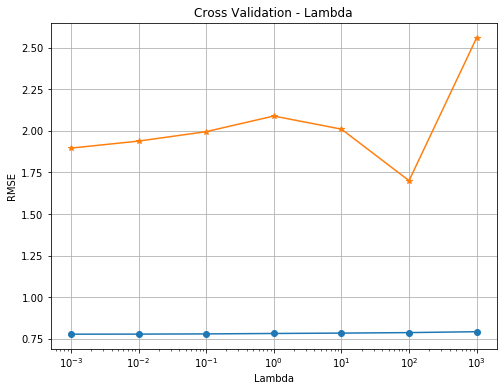

In [18]:
plot_cross_validation_lambda(losses_lambda)

In [19]:
losses_lambda

,lambdas,losses_tr,losses_te
0,0.001,0.779618,1.896248
1,0.010,0.780012,1.938364
2,0.100,0.781244,1.995061
3,1.000,0.783790,2.088811
4,10.000,0.786085,2.010257
5,100.000,0.789043,1.700982
6,1000.000,0.794465,2.559189


In [ ]:
2